# Regressão Logística

Esse código tem como objetivo mostrar um exemplo de como utilizar o método de regressão logística para prever resultados de consumo de combustível, além de analisar as variáveis. A base de dados utilizada foi o dataset público Weekly, o qual é uma base que contém retornos percentuais semanais para o índice de ações S&P 500 entre 1990 e 2010.

#### Passo 0: Import libs

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#### Passo 1: Abertura dos dados

In [24]:
data = pd.read_csv('Weekly.csv') 

A base contém as seguintes variáveis:
Ano: O ano em que a observação foi registrada
Lag1: Retorno percentual da semana anterior
...
Lag5: Retorno percentual das 5 semanas anteriores
Volume: Volume de ações negociadas (número médio de ações diárias negociadas em bilhões)
Hoje: Retorno percentual para esta semana
Direção: Um fator com níveis para baixo e para cima que indica se o mercado teve um retorno positivo ou negativo em uma determinada semana 

In [25]:
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


#### Passo 2: Algumas análises

In [26]:
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [27]:
data.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


Text(0, 0.5, 'Volume')

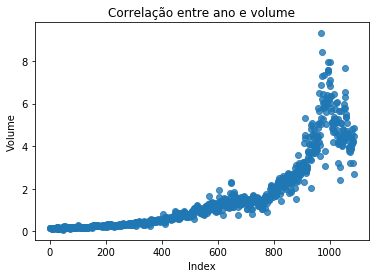

In [28]:
sns.regplot(data.index, data["Volume"],  fit_reg=False)
plt.title('Correlação entre ano e volume')
plt.xlabel('Index')
plt.ylabel('Volume')

Vemos que existem uma correlação entre ano e volume. Conforme o tempo passa, o volume aumenta.

#### Parte 3: Aplicando regressão logística

Usando a lib sklearn

In [37]:
X = data[["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]]
Y = data[["Direction"]]
logisticRegr = LogisticRegression()
logisticRegr.fit(X, Y)
predictions = logisticRegr.predict(X)
print(metrics.confusion_matrix(Y, predictions))
print(classification_report(Y, predictions))

[[ 55 429]
 [ 47 558]]
              precision    recall  f1-score   support

        Down       0.54      0.11      0.19       484
          Up       0.57      0.92      0.70       605

    accuracy                           0.56      1089
   macro avg       0.55      0.52      0.44      1089
weighted avg       0.55      0.56      0.47      1089



Da mesma forma que a regressão linear, a biblioteca sklearn não nos fornece as estatístcas das variáveis. Assim, vamos usar a biblioteca statsmodels para verificar quais variáveis são estatisticamente significantes:

In [43]:
model = sm.GLM.from_formula("Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume", family = sm.families.Binomial(), data=data)
log_reg = model.fit() 
print(log_reg.summary()) 

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Wed, 10 Feb 2021   Deviance:                       1486.4
Time:                                          15:00:52   Pearson chi2:                 1.09e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

Vemos que a variável Lag2 é a única signifivcante, com o p-valor < 0.05

In [44]:
model = sm.GLM.from_formula("Direction ~ Lag2" , family = sm.families.Binomial(), data=data)
log_reg = model.fit() 
print(log_reg.summary()) 

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1087
Model Family:                                  Binomial   Df Model:                            1
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -745.21
Date:                                  Wed, 10 Feb 2021   Deviance:                       1490.4
Time:                                          15:10:24   Pearson chi2:                 1.09e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

In [134]:
probs = log_reg.predict(X["Lag2"])
probs

0       0.422276
1       0.433897
2       0.450716
3       0.486757
4       0.392843
5       0.435502
6       0.428322
7       0.467899
8       0.434036
9       0.445886
10      0.427170
11      0.488358
12      0.474485
13      0.403284
14      0.385261
15      0.434915
16      0.446786
17      0.409342
18      0.465601
19      0.428430
20      0.478683
21      0.435239
22      0.444785
23      0.408432
24      0.470713
25      0.481786
26      0.484436
27      0.488828
28      0.482304
29      0.524441
          ...   
1059    0.444072
1060    0.481676
1061    0.407992
1062    0.410041
1063    0.503551
1064    0.525286
1065    0.364750
1066    0.465414
1067    0.392334
1068    0.448013
1069    0.418497
1070    0.505638
1071    0.457409
1072    0.456832
1073    0.389314
1074    0.439458
1075    0.424207
1076    0.414971
1077    0.449815
1078    0.421081
1079    0.431862
1080    0.437448
1081    0.446290
1082    0.391571
1083    0.480438
1084    0.445855
1085    0.459919
1086    0.4010

In [61]:
predictions = probs.copy()
predictions = predictions.apply(lambda x: str(x))
for i in range(0, len(predictions)):
    if probs[i] >= 0.5:
        predictions = predictions.replace(predictions[i], "Up")
    else:
        predictions = predictions.replace(predictions[i], "Down")
print(metrics.confusion_matrix(Y, predictions))
print(classification_report(Y, predictions))

[[451  33]
 [579  26]]
              precision    recall  f1-score   support

        Down       0.44      0.93      0.60       484
          Up       0.44      0.04      0.08       605

    accuracy                           0.44      1089
   macro avg       0.44      0.49      0.34      1089
weighted avg       0.44      0.44      0.31      1089



#### Parte 4: Visualização

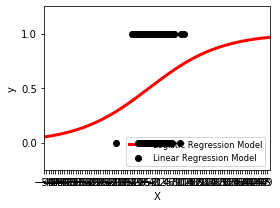

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.special import expit

X = data[["Lag2"]]
y = data["Direction"].apply(lambda x: 1 if x == "Up" else 0)

# Treinamento do modelo
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# Plotando os resultados
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.Lag2.values.ravel(),y.values.ravel(), color='black', zorder=20)
X_test = np.linspace(-50, 50, 300)

#clf.coef_[0,1]
loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

"""ols = linear_model.LinearRegression
ols.fit(X, y)
plt.plot(X_test, ols.coef_[0,1] * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')"""

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-50, 50))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-50, 50)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()